# Assignment 1 — Recognize a Digit (MNIST) using TensorFlow / Keras
This notebook trains a small CNN on the MNIST dataset and explains each line of code.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


import numpy as np — imports NumPy (fast numerical arrays) and aliases it np.

import matplotlib.pyplot as plt — imports plotting functions so we can plot sample images and training curves.

import tensorflow as tf — imports TensorFlow (the main library we will use).

from tensorflow import keras — imports Keras API that comes with TensorFlow for building models easily.

from tensorflow.keras import layers, models — imports commonly used Keras modules: layers (to create layers) and models (to create Sequential/Model objects).

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Train shape:", x_train.shape, "Test shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28) Test shape: (10000, 28, 28)


keras.datasets.mnist.load_data() — downloads (or loads cached) MNIST dataset of 28x28 grayscale images and labels.

The function returns (x_train, y_train), (x_test, y_test) which we unpack.

print(...) — shows shapes so you can verify: x_train should be (60000, 28, 28) and x_test (10000, 28, 28).


In [3]:
# reshape images to add channel dimension and scale to [0,1]
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# convert labels to one-hot vectors (10 classes)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)


reshape(-1, 28, 28, 1) — adds a channel dimension (TensorFlow expects shape (batch, height, width, channels)). -1 lets NumPy compute the batch size.

.astype('float32') — ensures numeric type is float32 (GPU-friendly).

/ 255.0 — normalizes pixel values from [0,255] to [0,1] which helps training stability.

num_classes = 10 — number of digit categories (0–9).

to_categorical(...) — converts integer labels (e.g., 7) into one-hot vectors of length 10 (e.g., [0,0,0,0,0,0,0,1,0,0]).



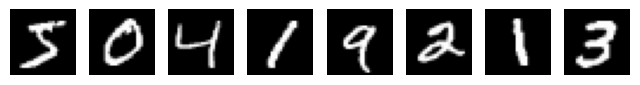

In [4]:
plt.figure(figsize=(8,2))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.show()


plt.figure(figsize=(8,2)) — creates a plotting canvas of given size.

for i in range(8): — loop to show first 8 images.

plt.subplot(1,8,i+1) — arrange subplots in 1 row, 8 columns.

plt.imshow(...) — display the image; reshape(28,28) removes the channel for plotting.

plt.axis('off') — hide axes for clarity.

plt.show() — render the figure.

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

models.Sequential([...]) — builds a simple stack of layers (Sequential model).

Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)) — first convolutional layer with 32 filters, kernel size 3×3, ReLU activation. input_shape is required for the first layer.

MaxPooling2D((2,2)) — reduces spatial dimensions by half (downsampling).

Conv2D(64, (3,3), activation='relu') — second convolutional layer with 64 filters.

MaxPooling2D((2,2)) — another pooling layer.

Flatten() — flattens 2D feature maps into 1D vector for the dense layers.

Dense(128, activation='relu') — fully connected layer with 128 neurons.

Dropout(0.5) — randomly drops 50% of units during training to reduce overfitting.

Dense(num_classes, activation='softmax') — output layer giving probabilities across 10 classes.

model.summary() — print model architecture and parameter counts so you can inspect structure.

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


optimizer='adam' — Adam optimizer (adaptive gradient method) — good default.

loss='categorical_crossentropy' — appropriate loss when labels are one-hot vectors.

metrics=['accuracy'] — track classification accuracy during training and validation.



In [7]:
history = model.fit(x_train, y_train,
                    epochs=8,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=2)


Epoch 1/8
422/422 - 43s - 102ms/step - accuracy: 0.9034 - loss: 0.3178 - val_accuracy: 0.9793 - val_loss: 0.0666
Epoch 2/8
422/422 - 80s - 188ms/step - accuracy: 0.9702 - loss: 0.1010 - val_accuracy: 0.9865 - val_loss: 0.0444
Epoch 3/8
422/422 - 41s - 98ms/step - accuracy: 0.9789 - loss: 0.0737 - val_accuracy: 0.9887 - val_loss: 0.0384
Epoch 4/8
422/422 - 42s - 99ms/step - accuracy: 0.9817 - loss: 0.0611 - val_accuracy: 0.9877 - val_loss: 0.0436
Epoch 5/8
422/422 - 39s - 93ms/step - accuracy: 0.9834 - loss: 0.0534 - val_accuracy: 0.9897 - val_loss: 0.0369
Epoch 6/8
422/422 - 39s - 92ms/step - accuracy: 0.9867 - loss: 0.0432 - val_accuracy: 0.9915 - val_loss: 0.0311
Epoch 7/8
422/422 - 41s - 97ms/step - accuracy: 0.9880 - loss: 0.0395 - val_accuracy: 0.9910 - val_loss: 0.0334
Epoch 8/8
422/422 - 42s - 101ms/step - accuracy: 0.9890 - loss: 0.0354 - val_accuracy: 0.9908 - val_loss: 0.0331


model.fit(...) — starts training.

x_train, y_train — training data and labels.

epochs=8 — number of full passes over training data (you can increase to 12–15 if your machine allows).

batch_size=128 — number of samples per gradient update.

validation_split=0.1 — hold out 10% of training data for validation to monitor generalization.

verbose=2 — sets printing mode for training progress.

history — stores loss/accuracy per epoch so we can plot later.

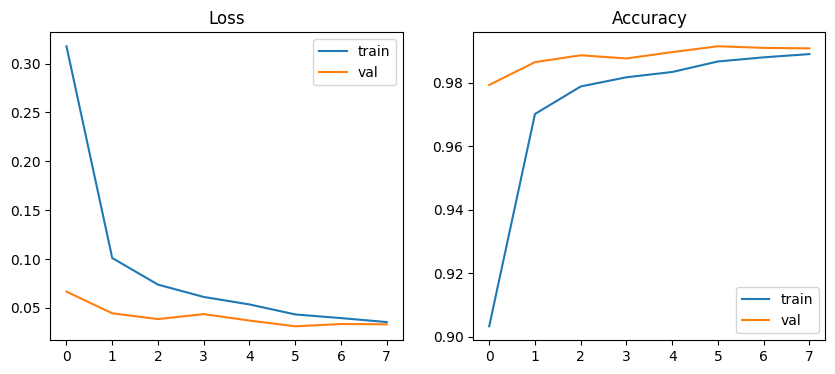

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train','val'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','val'])
plt.show()


history.history — dictionary with lists for 'loss', 'val_loss', 'accuracy', 'val_accuracy'.

Plotting code draws training vs validation curves for quick inspection of overfitting/underfitting.



In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 3s - 10ms/step - accuracy: 0.9921 - loss: 0.0235
Test accuracy: 0.9921000003814697


model.evaluate(...) — computes loss and metrics on the test dataset that the model has never seen.

Returns test_loss and test_acc (since we asked for 'accuracy' metric).

print(...) — display final test accuracy.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted: 7 True: 7


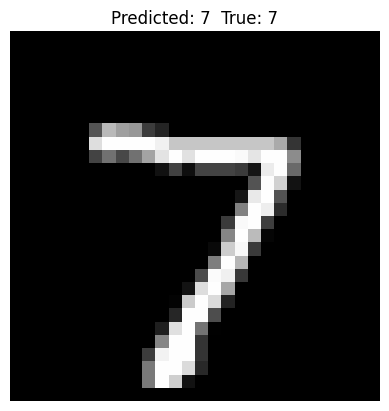

In [10]:
sample_index = 0
sample_image = x_test[sample_index]
pred_probs = model.predict(sample_image.reshape(1,28,28,1))
pred_label = np.argmax(pred_probs, axis=1)[0]
true_label = np.argmax(y_test[sample_index])
print("Predicted:", pred_label, "True:", true_label)
plt.imshow(sample_image.reshape(28,28), cmap='gray')
plt.title(f"Predicted: {pred_label}  True: {true_label}")
plt.axis('off')
plt.show()


sample_index = 0 — pick the first test sample.

sample_image = x_test[sample_index] — extract image tensor.

model.predict(...) — predict probabilities for the single image. We reshape to include batch dimension (1,28,28,1).

np.argmax(pred_probs, axis=1)[0] — pick the label with highest probability.

np.argmax(y_test[sample_index]) — get true one-hot label's index.

Print and plot to visually confirm prediction.

In [11]:
model.save('mnist_cnn.h5')  # Keras model file that can be loaded later


model.save('mnist_cnn.h5') — writes the model architecture, weights, and optimizer state to a file called mnist_cnn.h5. You can download this file and attach to GitHub if needed.

In [12]:
import pandas as pd
preds = model.predict(x_test[:100])
pred_labels = np.argmax(preds, axis=1)
df = pd.DataFrame({'index': np.arange(100), 'predicted': pred_labels})
df.to_csv('predictions_sample100.csv', index=False)
print("Saved predictions_sample100.csv")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Saved predictions_sample100.csv


pandas used for easy CSV export.

Predict first 100 test images and write results into CSV for submission if required.

